## 1. Dataset
Before we get to the data, let's initialize our environment:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# we don't like warnings
import warnings
warnings.filterwarnings('ignore')

Same dataset as **[Topic 01](https://github.com/IlyessAgg/mLcourse/blob/master/topic01_pandas_data_analysis/topic1_pandas_data_analysis.ipynb)** : customer churn for a telecom operator. Quick look of the dataset:

In [4]:
df = pd.read_csv('../Datasets/Topic01/telecom_churn.csv')
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...    total eve calls  total eve charge  \
0             45.07  ...                 99             16.78   
1             27.47  ...                103             16.62   
2             41.38  ...                110             10.30   
3             50.90  ...                 88              5.26   
4             28.34  ...                122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

The last column, **Churn**, is our target variable. *True* indicates that that the company eventually lost this customer, and *False* indicates that the customer was retained. Later, we will build models that predict this feature based on the remaining features.

## 2. Univariate visualization

*Univariate* analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the *distribution of its values* and ignore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.

#### 2.1 Quantitative features

*Quantitative features* take on ordered numerical values. Those values can be *discrete*, like integers, or *continuous*, like real numbers, and usually express a count or a measurement.

#### Histograms and density plots

The easiest way to take a look at the distribution of a numerical variable is to plot its *histogram* using the `DataFrame`'s method `hist()`.

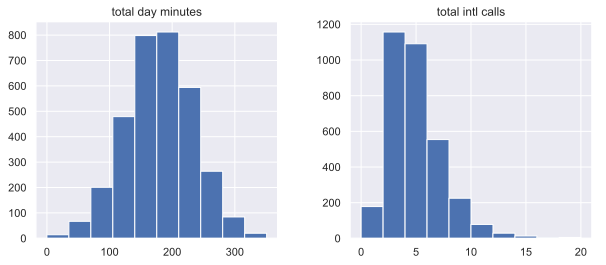

In [5]:
features = ['total day minutes', 'total intl calls']
df[features].hist(figsize = (10,4));

The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential, etc. 
Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type (most often Gaussian). 

In the above plot, we see that the variable *Total day minutes* is normally distributed, while *Total intl calls* is prominently skewed right (its tail is longer on the right).

Another way to grasp the distribution is *density plot*. It can be considered a smoothed way of the histogram. Let's create density plots for the same two variables:

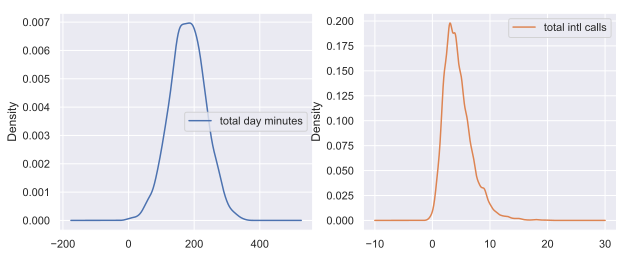

In [6]:
df[features].plot(kind='density', subplots=True, layout=(1,2), sharex=False, figsize=(10, 4));

It is also possible to plot a distribution of observations with `seaborn`'s `distplot()`.

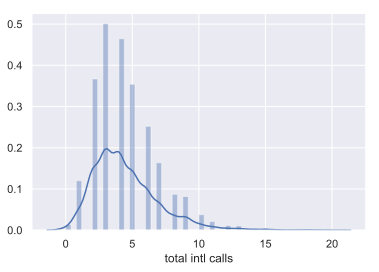

In [7]:
sns.distplot(df['total intl calls']);

The height of the histogram bars here is normed and shows the density rather than the number of examples in each bin.

#### Box plot

Another useful type of visualization is a *box plot*.

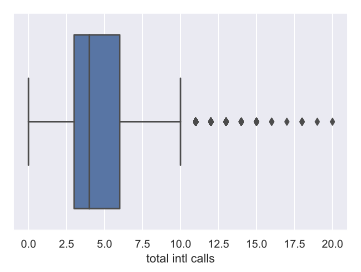

In [8]:
sns.boxplot(x = 'total intl calls', data = df);

The box by itself illustrates the interquartile spread of the distribution. The vertical line inside the box marks the median (50%) of the distribution.

The whiskers (lines extending from the box) represent the entire scatter of data points.

Outliers that fall outside of the range bounded by the whiskers are plotted individually as black points along the central axis.

We can see that a large number of international calls is quite rare in our data.

#### *Violin plot*

The last type of distribution plots that we will consider is a *violin* plot.

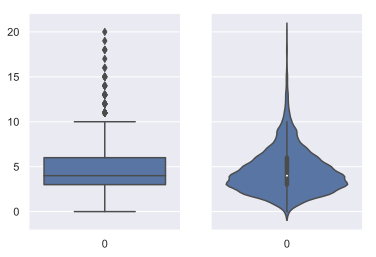

In [9]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['total intl calls'], ax=axes[0]);
sns.violinplot(data=df['total intl calls'], ax=axes[1]);

The difference between the box and violin plots is that the former illustrates certain statistics concerning individual examples in a dataset while the violin plot concentrates more on the smoothed distribution as a whole.

#### *describe()*

In order to get the exact numerical statistics of the distribution, we can use the method `describe()`:

In [10]:
df[features].describe()

total day minutes  total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

#### Categorical and binary features

*Categorical features* take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a *category*, which reflects some qualitative property of this example. If the values of a categorical variable are ordered, it is called *ordinal*.

#### *Frequency table*

Let’s check the class balance in our dataset by looking at the distribution of the target variable: the *churn rate*. First, we will get a frequency table, which shows how frequent each value of the categorical variable is. For this, we will use the `value_counts()` method:

In [11]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In our case, the data is not balanced; that is, our two target classes, loyal and disloyal customers, are not represented equally in the dataset. Only a small part of the clients canceled their subscription to the telecom service. As we will see in the following articles, this fact may imply some restrictions on measuring the classification performance, and, in the future, we may want to additionaly penalize our model errors in predicting the minority *"Churn"* class.

#### *Bar plot*

The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the `seaborn`'s function `countplot()`. There is another function in `seaborn` that is somewhat confusingly called `barplot()` and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature.

Let's plot the distributions for two categorical variables:

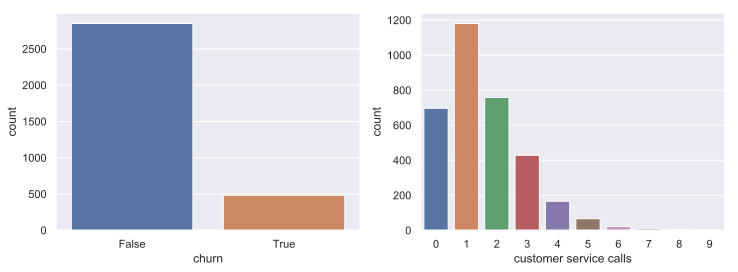

In [12]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='churn', data=df, ax=axes[0]);
sns.countplot(x='customer service calls', data=df, ax=axes[1]);

While the histograms, discussed above, and bar plots may look similar, there are several differences between them:

1. Histograms are best suited for looking at the distribution of numerical variables while bar plots are used for categorical features.
2. The values on the X-axis in the histogram are numerical; a bar plot can have any type of values on the X-axis: numbers, strings, booleans.
3. The histogram's X-axis is a Cartesian coordinate axis along which values cannot be changed; the ordering of the bars is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, when we consider ordinal variables (like Customer service calls in our data), the bars are usually ordered by variable value.

The left chart above vividly illustrates the imbalance in our target variable. The bar plot for *Customer service calls* on the right gives a hint that the majority of customers resolve their problems in maximum 2–3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. It may well be that the tail of that bar plot contains most of our churn. These are just hypotheses for now, so let's move on to some more interesting and powerful visual techniques.



## 3. Multivariate visualization

*Multivariate plots* allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

#### 3.1 Quantitative vs Quantitative

#### *Correlation matrix*

Let's look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method `corr()` that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to `heatmap()` from `seaborn`, which renders a color-coded matrix for the provided values:

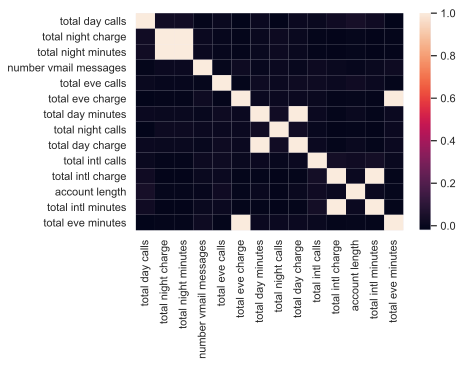

In [13]:
numerical = list(set(df.columns) - 
                 set(['state', 'international plan', 'voice mail plan', 
                      'area code', 'churn', 'customer service calls']))

corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

From the colored correlation matrix generated above, we can see that there are 4 variables such as *Total day charge* that have been calculated directly from the number of minutes spent on phone calls (*Total day minutes*). These are called *dependent* variables and can therefore be left out since they do not contribute any additional information. Let's get rid of them:

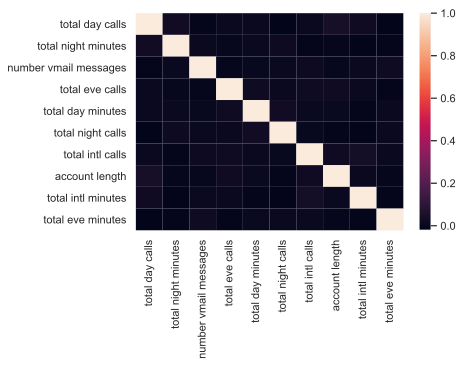

In [14]:
numerical = list(set(numerical) - 
                 set(['total day charge', 'total eve charge', 'total night charge', 'total intl charge']))

corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

#### *Scatter plot*

The *scatter plot* displays values of two numerical variables as *Cartesian coordinates* in 2D space. Scatter plots in 3D are also possible.

Let's try out the function `scatter()` from the `matplotlib` library:

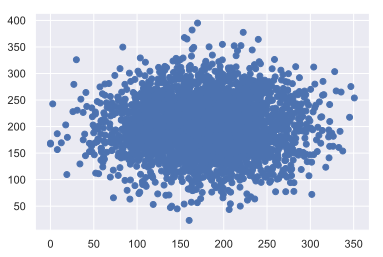

In [15]:
plt.scatter(df['total day minutes'], df['total night minutes']);

We get an uninteresting picture of two normally distributed variables. Also, it seems that these features are uncorrelated because the ellipse-like shape is aligned with the axes.

There is a slightly fancier option to create a scatter plot with the `seaborn` library:

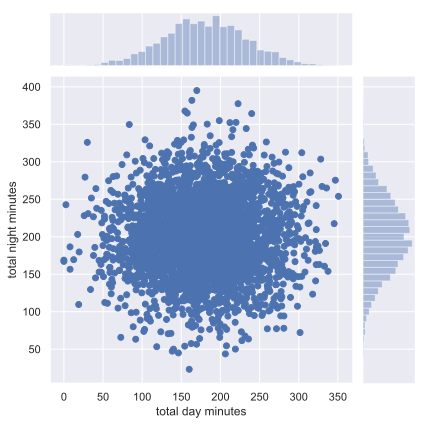

In [16]:
sns.jointplot(x='total day minutes', y='total night minutes', data=df, kind='scatter');

Using the same function, we can also get a smoothed version of our bivariate distribution:

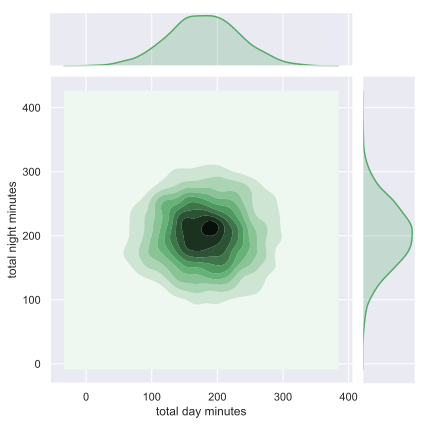

In [17]:
sns.jointplot('total day minutes', 'total night minutes', data=df, kind='kde', color='g');

This is basically a bivariate version of the *Kernel Density Plot* discussed earlier.

#### *Scatterplot matrix*

In some cases, we may want to plot a *scatterplot matrix* such as the one shown below. Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.

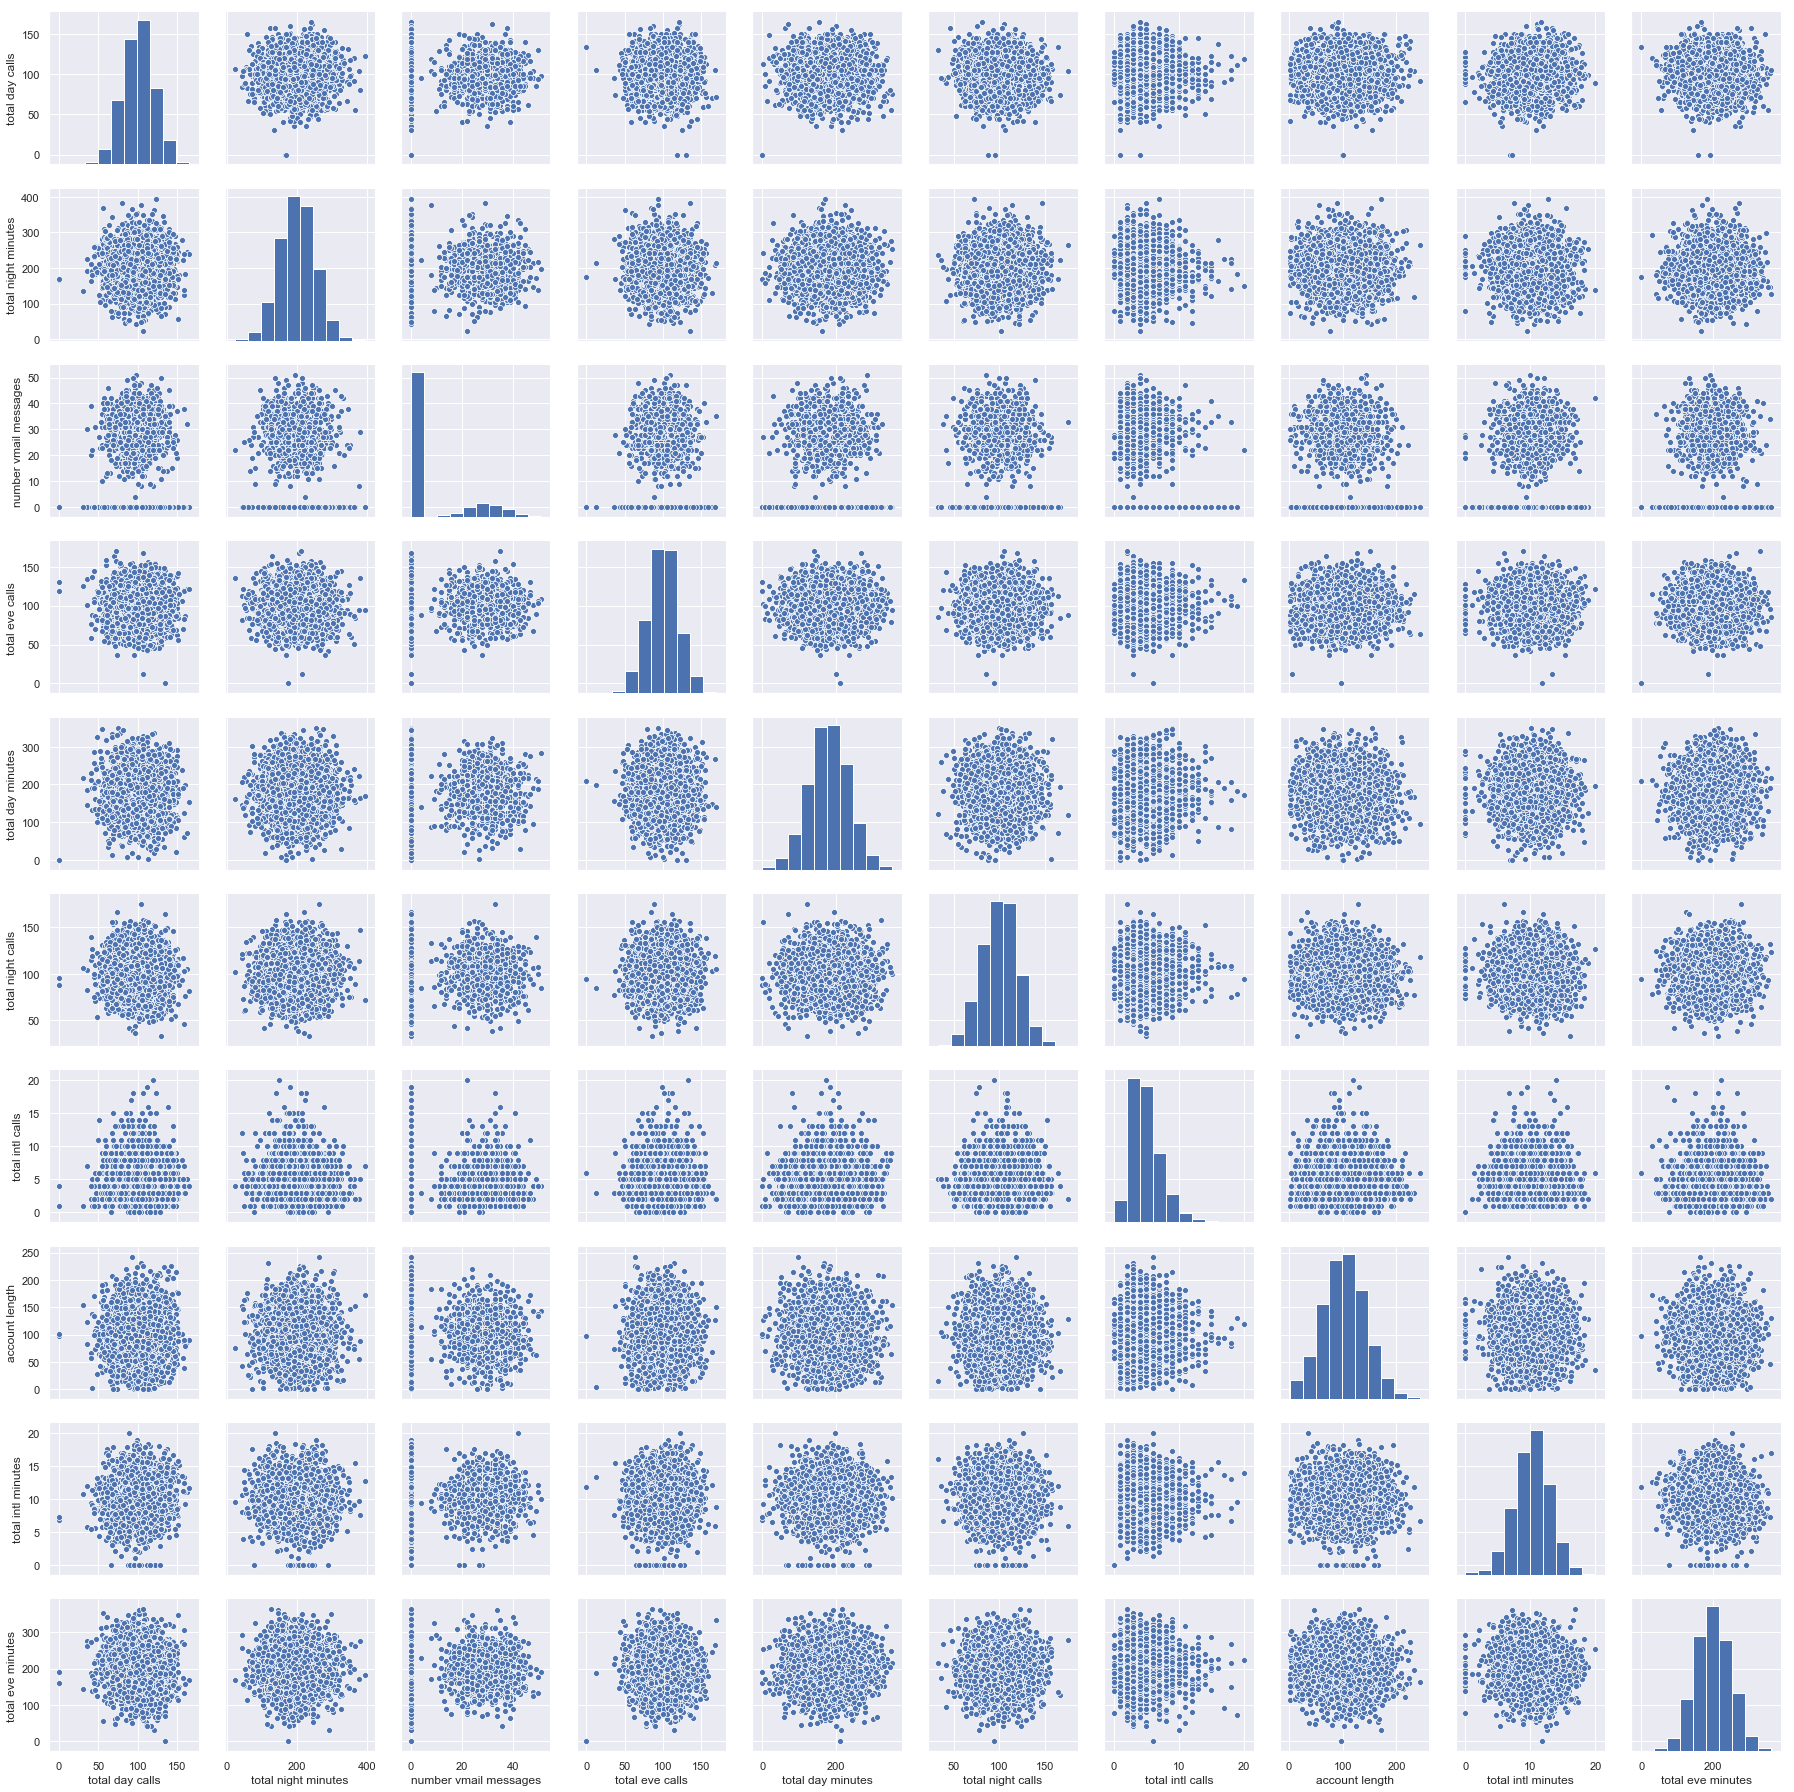

In [18]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [19]:
%config InlineBackend.figure_format = 'svg'

Sometimes, such a visualization may help draw conclusions about data; but, in this case, everything is pretty clear with no surprises.

#### 3.2 Quantitative vs. Categorical
In this section, we will make our simple quantitative plots a little more exciting. We will try to gain new insights for churn prediction from the interactions between the numerical and categorical features.

More specifically, let's see how the input variables are related to the target variable Churn.

Previously, you learned about scatter plots. Additionally, their points can be color or size coded so that the values of a third categorical variable are also presented in the same figure. We can achieve this with the `scatter()` function seen above, but, let's try a new function called `lmplot()` and use the parameter `hue` to indicate our categorical feature of interest:

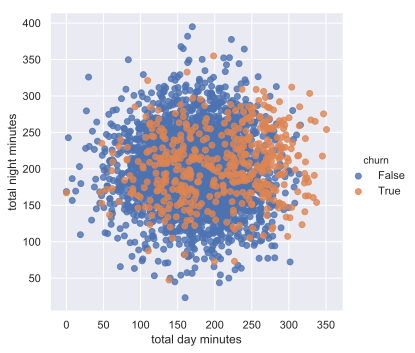

In [20]:
sns.lmplot('total day minutes', 'total night minutes', data=df, hue='churn', fit_reg=False);

It seems that our small proportion of disloyal customers lean towards the top-right corner; that is, such customers tend to spend more time on the phone during both day and night. But this is not absolutely clear, and we won't make any definitive conclusions from this chart.

Now, let’s create box plots to visualize the distribution statistics of the numerical variables in two disjoint groups: the loyal customers (`Churn=False`) and those who left (`Churn=True`).

In [ ]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append('customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

From this chart, we can see that the greatest discrepancy in distribution between the two groups is for three variables: *Total day minutes, Customer service calls*, and *Number vmail messages*. Later in this course, we will learn how to determine feature importance in classification using *Random Forest* or *Gradient Boosting*; there, we will see that the first two features are indeed very important for churn prediction.

Let's look at the distribution of day minutes spoken for the loyal and disloyal customers separately. We will create box and violin plots for *Total day minutes* grouped by the target variable.

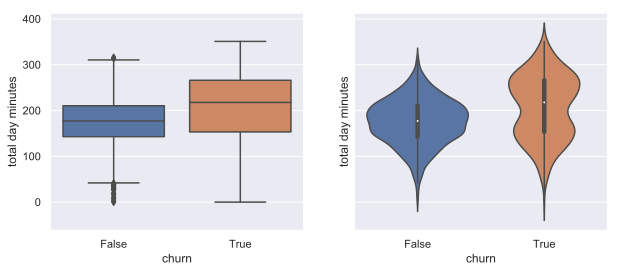

In [21]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='churn', y='total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='churn', y='total day minutes', data=df, ax=axes[1]);

In this case, the violin plot does not contribute any additional information about our data as everything is clear from the box plot alone: disloyal customers tend to talk on the phone more.

**An interesting observation**: on average, customers that discontinue their contracts are more active users of communication services. Perhaps they are unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rates. The company will need to undertake additional economic analysis to find out whether such measures would be beneficial.

When we want to analyze a quantitative variable in two categorical dimensions at once, there is a suitable function for this in the `seaborn` library called `catplot()`. For example, let's visualize the interaction between *Total day minutes* and two categorical variables in the same plot:

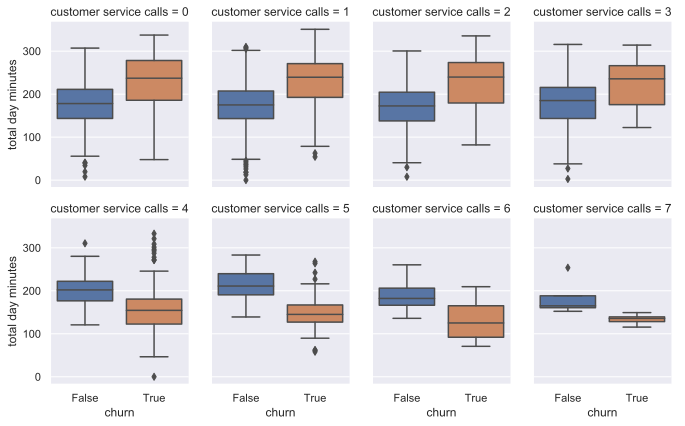

In [22]:
sns.catplot(x='churn', y='total day minutes', col='customer service calls',
               data=df[df['customer service calls'] < 8], kind="box",
               col_wrap=4, height=3, aspect=.8);

From this, we could conclude that, starting with 4 calls, *Total day minutes* may no longer be the main factor for customer churn. Perhaps, in addition to our previous guess about the tariffs, there are customers that are dissatisfied with the service due to other problems, which might lead to fewer number of day minutes spent on calls.

#### 3.3 Categorical vs. Categorical

As we saw earlier in this article, the variable *Customer service calls* has few unique values and, thus, can be considered either numerical or ordinal. We have already seen its distribution with a count plot. Now, we are interested in the relationship between this ordinal feature and the target variable Churn.

Let's look at the distribution of the number of calls to customer service, again using a count plot. This time, let's also pass the parameter `hue=Churn` that adds a categorical dimension to the plot:

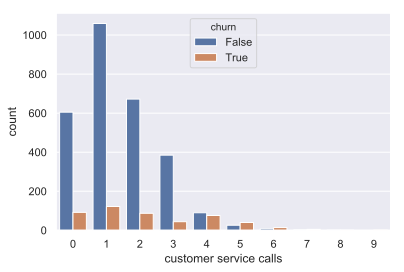

In [24]:
sns.countplot(x='customer service calls', hue='churn', data=df);

**An observation**: the churn rate increases significantly after 4 or more calls to customer service.

Now, let's look at the relationship between *Churn* and the binary features, *International plan* and *Voice mail plan*.

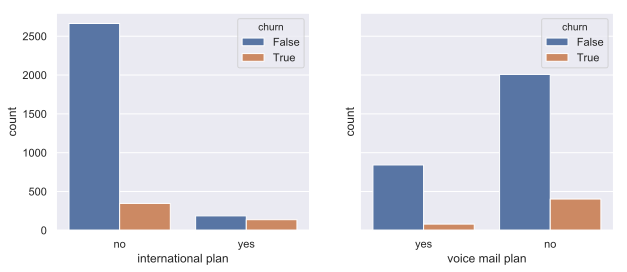

In [25]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='international plan', hue='churn', data=df, ax=axes[0]);
sns.countplot(x='voice mail plan', hue='churn', data=df, ax=axes[1]);